<a href="https://colab.research.google.com/github/18cse098/dmdw/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
path="https://raw.githubusercontent.com/18cse098/dmdw/main/indian_food.csv"

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv(path)


In [8]:
df


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [14]:
df1=df[['name','diet','prep_time','cook_time','flavor_profile','course','state']]

In [15]:

df1.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal


In [19]:
df1=df1.replace('sweet',1)



In [20]:
df1.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state
0,Balu shahi,vegetarian,45,25,1,dessert,West Bengal
1,Boondi,vegetarian,80,30,1,dessert,Rajasthan
2,Gajar ka halwa,vegetarian,15,60,1,dessert,Punjab
3,Ghevar,vegetarian,15,30,1,dessert,Rajasthan
4,Gulab jamun,vegetarian,15,40,1,dessert,West Bengal


In [21]:

n=np.array(df1[['diet','course']])
n=n.reshape(-1,2)
n.shape


(255, 2)

In [28]:
nominal=df[['name','diet','course','state']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['name']=lb.fit_transform(nominal['name'])
nominal['diet']=lb.fit_transform(nominal['diet'])
nominal['course']=lb.fit_transform(nominal['course'])
nominal['state']=lb.fit_transform(nominal['state'])

In [31]:
nominal.head()


,name,diet,course,state
0,13,1,0,24
1,27,1,0,18
2,71,1,0,17
3,76,1,0,18
4,80,1,0,24


In [32]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)


array([[ 13,   1],
       [  0,  24],
       [ 27,   1],
       ...,
       [  0,  11],
       [192,   1],
       [  0,   5]])

In [33]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[  0.          15.23154621  58.42088668 ... 217.58906223 138.61096638
  180.00555547]
 [ 15.23154621   0.          44.01136217 ... 203.24615618 124.19742348
  165.51132892]
 [ 58.42088668  44.01136217   0.         ... 159.25451328  80.22468448
  121.59358536]
 ...
 [217.58906223 203.24615618 159.25451328 ...   0.          79.0569415
   38.11823711]
 [138.61096638 124.19742348  80.22468448 ...  79.0569415    0.
   41.43669871]
 [180.00555547 165.51132892 121.59358536 ...  38.11823711  41.43669871
    0.        ]]


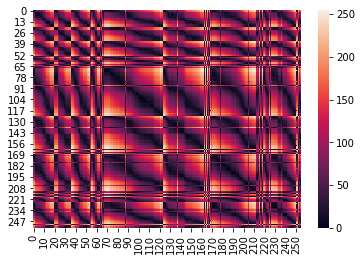

In [34]:
sns.heatmap(dist_matrix)
plt.show()

In [36]:
numeric=df[['name','state','ingredients']]
numeric.head()

,name,state,ingredients
0,Balu shahi,West Bengal,"Maida flour, yogurt, oil, sugar"
1,Boondi,Rajasthan,"Gram flour, ghee, sugar"
2,Gajar ka halwa,Punjab,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,Rajasthan,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,West Bengal,"Milk powder, plain flour, baking powder, ghee,..."


In [37]:
num1=np.array(numeric[['state','ingredients']])
num1.reshape(-1,2)
num1.shape

(255, 2)

In [41]:

num2=np.array(numeric[['name']])
num2.reshape(-1)
num2.shape

(255, 1)